In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
# matplotlib inline

In [46]:
# given raw_video.mp4, extract the first frame
root_dir = '/home/ubuntu/example_demo_session/'
video_path = os.path.join(root_dir, 'demos/mapping/raw_video.mp4')
if not os.path.exists(video_path):
    print(f'video {video_path} does not exist')
cap = cv2.VideoCapture(video_path)
ret, img = cap.read()
cap.release()

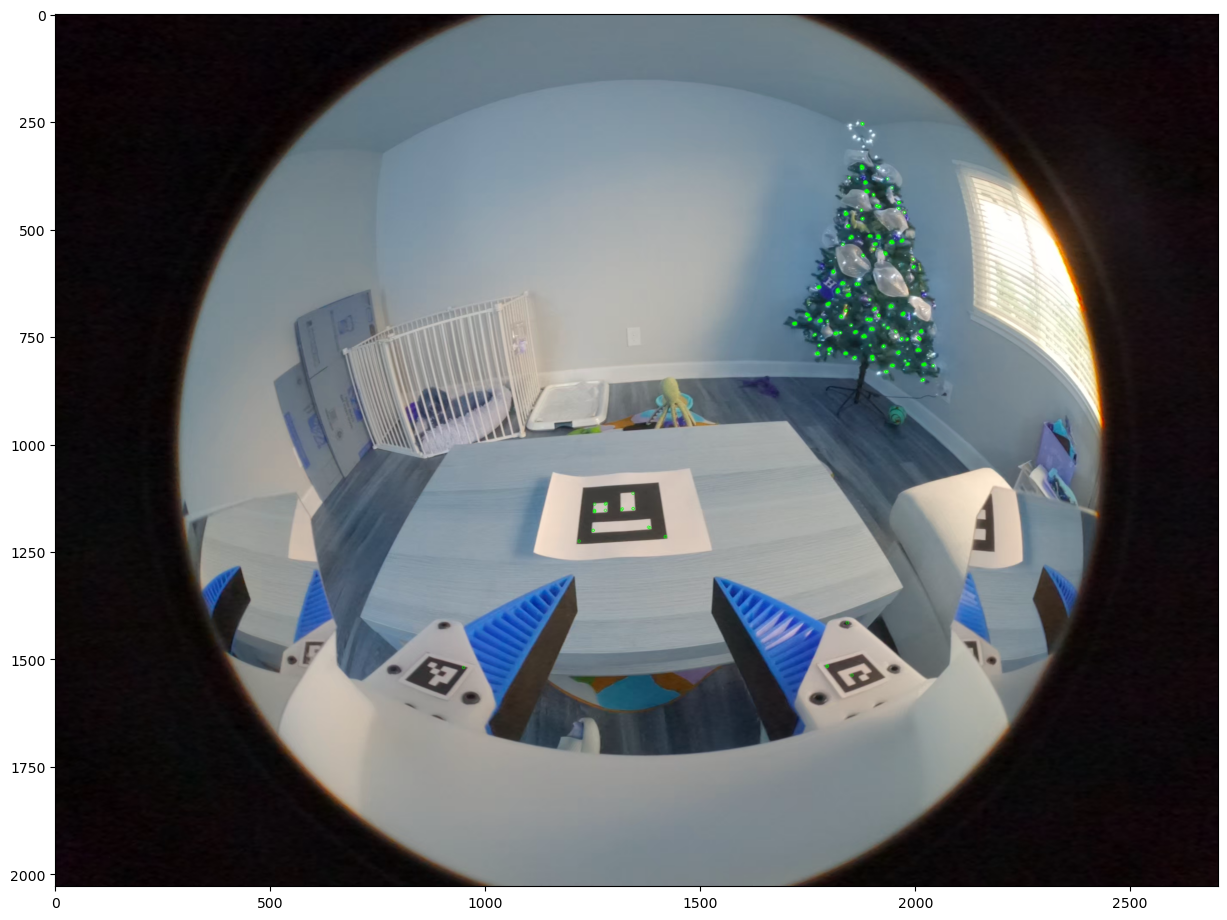

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create an ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(15, 15))
plt.imshow(img_with_keypoints)

In [ ]:
# Binary Descriptor and (Hamming) Distance between Descriptors
print(len(keypoints))
print(descriptors.shape)

""" 
The `descriptors` returned by the `detectAndCompute` method of the ORB (Oriented FAST and Rotated BRIEF) object in OpenCV are binary strings that represent the description of the keypoints detected in the image. These descriptors are used when matching keypoints between different images.

Each row in the `descriptors` array corresponds to the descriptor for a keypoint. The descriptor is a binary string that is generated by comparing the intensity of pairs of pixels in a patch around the keypoint. The exact method of comparison is determined by the ORB algorithm.

The value of the descriptor is used to measure the similarity between keypoints. Two keypoints are considered to be a match if their descriptors are sufficiently similar. This is typically done using Hamming distance, which is a measure of the number of bit positions in which two binary strings differ.

In summary, the `descriptors` are a compact, binary representation of the local image features around each detected keypoint. They are used for matching keypoints between images, which is a common task in many computer vision applications, such as object recognition, image stitching, and SLAM (Simultaneous Localization and Mapping).
"""

descriptor1 = "10101"
descriptor2 = "10111"
hamming_distance = 0

for d1, d2 in zip(descriptor1, descriptor2):
    if d1 != d2:
        hamming_distance += 1

print(hamming_distance)  # Output: 1

descriptor2 = "10111"
descriptor3 = "01000"
hamming_distance = 0

for d2, d3 in zip(descriptor2, descriptor3):
    if d2 != d3:
        hamming_distance += 1

print(hamming_distance)  # Output: 4


In [52]:
map_atlas_path = os.path.join(root_dir, "demos/mapping/map_atlas.osa")


In [ ]:
# potential learning materials for SLAM
# 1. Cool video: http://handbookofrobotics.org/view-chapter/46/videodetails/454 
# 2. Course https://www.cs.columbia.edu/~allen/F19/notes.html 
# 3. Video: https://www.youtube.com/watch?v=_jwBKo0SXng 

# Challenge: Could not figure out how SLAM works.

# In a nutshell:
# Step 0: Observe -> Feature detection -> Correspondence (Data association).
# Step 1: ? Estimate motion based on correspondnece? 
# Step 2: ?? Map Update
# Step 3: ? Localization update
# Step 4: ? Loop closure